In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import data

In [ ]:
import pandas as pd
import numpy as np
#df= pd.read_csv('BTCUSDT10years.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT_TRADING_BOT/DATASET&CODE /PULL Dataset/dataset for 7month ago/BTCUSDT (3).csv')
import matplotlib.pyplot as plt

%matplotlib inline
df

,Date,Open,High,Low,Close,Volume,Quote_Volume,Trades_Count,div,Log_VolumeGain,pricegain
0,2021-03-19 07:17:00,58139.23,58208.94,58139.23,58188.42,30.0,1743055.0,1667,0.999155,0.000000,0.000000
1,2021-03-19 07:18:00,58190.01,58194.34,58124.83,58135.07,25.0,1449106.0,1056,1.000945,-18.469251,0.087342
2,2021-03-19 07:19:00,58135.07,58190.00,58135.06,58189.50,15.0,856455.0,1259,0.999065,-52.590032,-0.094415
3,2021-03-19 07:20:00,58189.50,58208.59,58189.49,58207.73,12.0,718842.0,1111,0.999687,-17.516019,0.093627
4,2021-03-19 07:21:00,58206.94,58243.34,58150.00,58184.66,30.0,1748389.0,1417,1.000383,88.880849,0.029971
...,...,...,...,...,...,...,...,...,...,...,...
307336,2021-10-19 07:17:00,62188.86,62188.86,62108.57,62119.88,18.0,1104347.0,543,1.001110,90.129481,0.054589
307337,2021-10-19 07:18:00,62119.88,62119.89,62065.18,62104.99,27.0,1689791.0,690,1.000240,42.535064,-0.110920
307338,2021-10-19 07:19:00,62099.01,62099.01,61999.99,62061.80,185.0,11491167.0,1657,1.000600,191.697380,-0.033596
307339,2021-10-19 07:20:00,62061.81,62079.51,62034.85,62042.03,16.0,979787.0,483,1.000319,-246.199873,-0.059904


### Preprocess data

In [ ]:
df = pd.concat([df.drop('Date', axis = 1), 
          (df.Date.str.split("-").str[:3].apply(pd.Series)
          .rename(columns={0:'year', 1:'month', 2:'day'}))], axis = 1)

In [ ]:
df = pd.concat([df.drop('day', axis = 1), 
          (df.day.str.split(" ").str[:2].apply(pd.Series)
          .rename(columns={0:'day', 1:'hours'}))], axis = 1)


In [ ]:
#df['year']=df['year'].astype('datetime64[ns]')
#df['year']=pd.to_datetime(df['year'])
#df['month']=pd.to_datetime(df['month'])
#df['day']=pd.to_datetime(df['day'])
#df['hours']=pd.to_datetime(df['hours'])
#df['Date'] = pd.to_datetime(df['Date']).dt.date

df['year']=df['year'].astype(float)
df['month']=df['month'].astype(float)
df['day']=df['day'].astype(float)
#df['hours']=df['hours'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307341 entries, 0 to 307340
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            307341 non-null  float64
 1   High            307341 non-null  float64
 2   Low             307341 non-null  float64
 3   Close           307341 non-null  float64
 4   Volume          307341 non-null  float64
 5   Quote_Volume    307341 non-null  float64
 6   Trades_Count    307341 non-null  int64  
 7   div             307341 non-null  float64
 8   Log_VolumeGain  307341 non-null  float64
 9   pricegain       307341 non-null  float64
 10  year            307341 non-null  float64
 11  month           307341 non-null  float64
 12  day             307341 non-null  float64
 13  hours           307341 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 32.8+ MB


In [ ]:

#df['hours'] = pd.to_numeric(df['hours'])
#df = df.astype({'hours':'int64'})
df['hours']=pd.to_datetime(df['hours'])

      

In [ ]:
df['hours'] = pd.to_numeric(df['hours'])


In [ ]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307341 entries, 0 to 307340
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            307341 non-null  float64
 1   High            307341 non-null  float64
 2   Low             307341 non-null  float64
 3   Close           307341 non-null  float64
 4   Volume          307341 non-null  float64
 5   Quote_Volume    307341 non-null  float64
 6   Trades_Count    307341 non-null  int64  
 7   div             307341 non-null  float64
 8   Log_VolumeGain  307341 non-null  float64
 9   pricegain       307341 non-null  float64
 10  year            307341 non-null  float64
 11  month           307341 non-null  float64
 12  day             307341 non-null  float64
 13  hours           307341 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 32.8 MB


In [ ]:

# X= df.loc[1:3,['Low' , 'High' 'Clase ' , 'Open', 'Volume' ]]
df['Open1'] = df['Open'].shift(-1)
df['High1'] = df['High'].shift(-1)
df['Low1'] = df['Low'].shift(-1)
df['Close1'] = df['Close'].shift(-1)
df['Volume1'] = df['Volume'].shift(-1)
#######2
df['Open2'] = df['Open'].shift(-1)
df['High2'] = df['High'].shift(-1)
df['Low2'] = df['Low'].shift(-1)
df['Close2'] = df['Close'].shift(-1)
df['Volume2'] = df['Volume'].shift(-1)
#######3
df['Open3'] = df['Open'].shift(-1)
df['High3'] = df['High'].shift(-1)
df['Low3'] = df['Low'].shift(-1)
df['Close3'] = df['Close'].shift(-1)
df['Volume3'] = df['Volume'].shift(-1)
#######4
df['Open4'] = df['Open'].shift(-1)
df['High4'] = df['High'].shift(-1)
df['Low4'] = df['Low'].shift(-1)
df['Close4'] = df['Close'].shift(-1)
df['Volume4'] = df['Volume'].shift(-1)

df

,Open,High,Low,Close,Volume,Quote_Volume,Trades_Count,div,Log_VolumeGain,pricegain,year,month,day,hours,Open1,High1,Low1,Close1,Volume1,Open2,High2,Low2,Close2,Volume2,Open3,High3,Low3,Close3,Volume3,Open4,High4,Low4,Close4,Volume4
0,58139.23,58208.94,58139.23,58188.42,30.0,1743055.0,1667,0.999155,0.000000,0.000000,2021.0,3.0,19.0,1640416620000000000,58190.01,58194.34,58124.83,58135.07,25.0,58190.01,58194.34,58124.83,58135.07,25.0,58190.01,58194.34,58124.83,58135.07,25.0,58190.01,58194.34,58124.83,58135.07,25.0
1,58190.01,58194.34,58124.83,58135.07,25.0,1449106.0,1056,1.000945,-18.469251,0.087342,2021.0,3.0,19.0,1640416680000000000,58135.07,58190.00,58135.06,58189.50,15.0,58135.07,58190.00,58135.06,58189.50,15.0,58135.07,58190.00,58135.06,58189.50,15.0,58135.07,58190.00,58135.06,58189.50,15.0
2,58135.07,58190.00,58135.06,58189.50,15.0,856455.0,1259,0.999065,-52.590032,-0.094415,2021.0,3.0,19.0,1640416740000000000,58189.50,58208.59,58189.49,58207.73,12.0,58189.50,58208.59,58189.49,58207.73,12.0,58189.50,58208.59,58189.49,58207.73,12.0,58189.50,58208.59,58189.49,58207.73,12.0
3,58189.50,58208.59,58189.49,58207.73,12.0,718842.0,1111,0.999687,-17.516019,0.093627,2021.0,3.0,19.0,1640416800000000000,58206.94,58243.34,58150.00,58184.66,30.0,58206.94,58243.34,58150.00,58184.66,30.0,58206.94,58243.34,58150.00,58184.66,30.0,58206.94,58243.34,58150.00,58184.66,30.0
4,58206.94,58243.34,58150.00,58184.66,30.0,1748389.0,1417,1.000383,88.880849,0.029971,2021.0,3.0,19.0,1640416860000000000,58184.66,58220.00,58184.66,58211.61,14.0,58184.66,58220.00,58184.66,58211.61,14.0,58184.66,58220.00,58184.66,58211.61,14.0,58184.66,58220.00,58184.66,58211.61,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307336,62188.86,62188.86,62108.57,62119.88,18.0,1104347.0,543,1.001110,90.129481,0.054589,2021.0,10.0,19.0,1640416620000000000,62119.88,62119.89,62065.18,62104.99,27.0,62119.88,62119.89,62065.18,62104.99,27.0,62119.88,62119.89,62065.18,62104.99,27.0,62119.88,62119.89,62065.18,62104.99,27.0
307337,62119.88,62119.89,62065.18,62104.99,27.0,1689791.0,690,1.000240,42.535064,-0.110920,2021.0,10.0,19.0,1640416680000000000,62099.01,62099.01,61999.99,62061.80,185.0,62099.01,62099.01,61999.99,62061.80,185.0,62099.01,62099.01,61999.99,62061.80,185.0,62099.01,62099.01,61999.99,62061.80,185.0
307338,62099.01,62099.01,61999.99,62061.80,185.0,11491167.0,1657,1.000600,191.697380,-0.033596,2021.0,10.0,19.0,1640416740000000000,62061.81,62079.51,62034.85,62042.03,16.0,62061.81,62079.51,62034.85,62042.03,16.0,62061.81,62079.51,62034.85,62042.03,16.0,62061.81,62079.51,62034.85,62042.03,16.0
307339,62061.81,62079.51,62034.85,62042.03,16.0,979787.0,483,1.000319,-246.199873,-0.059904,2021.0,10.0,19.0,1640416800000000000,62042.03,62046.42,62036.51,62045.85,10.0,62042.03,62046.42,62036.51,62045.85,10.0,62042.03,62046.42,62036.51,62045.85,10.0,62042.03,62046.42,62036.51,62045.85,10.0


In [ ]:
    import sklearn
    import pandas as pd
    from sklearn.impute import SimpleImputer
    import numpy as np
    from subprocess import check_output
    #from sklearn.preprocessing  import Imputer

    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline


    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC, LinearSVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.linear_model import Perceptron
    from sklearn.linear_model import SGDClassifier
    from sklearn.tree import DecisionTreeClassifier

In [ ]:
### Regression 
#y= df.loc[4 , ['Close' ]]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean',verbose=0)
df=df


In [ ]:
#soso=df.isnull().sum()
#soso
imputer = imputer.fit(df.iloc[:,7:34])
df.iloc[:,7:34]=imputer.transform(df.iloc[:,7:34])
soso=df.isnull().sum() 
soso

Open              0
High              0
Low               0
Close             0
Volume            0
Quote_Volume      0
Trades_Count      0
div               0
Log_VolumeGain    0
pricegain         0
year              0
month             0
day               0
hours             0
Open1             0
High1             0
Low1              0
Close1            0
Volume1           0
Open2             0
High2             0
Low2              0
Close2            0
Volume2           0
Open3             0
High3             0
Low3              0
Close3            0
Volume3           0
Open4             0
High4             0
Low4              0
Close4            0
Volume4           0
dtype: int64

In [ ]:


df=df.drop(['Low4','Open4','High4' , 'Volume4', 'pricegain','Log_VolumeGain', 'Trades_Count', 'div','Quote_Volume'], axis =1)

In [ ]:

X = df.loc[:, df.columns != 'Close4']
#X = df['Date','Open','High','Low','Volume','Quote_Volume','Trades_Count','div','Log_VolumeGain']

X



,Open,High,Low,Close,Volume,year,month,day,hours,Open1,High1,Low1,Close1,Volume1,Open2,High2,Low2,Close2,Volume2,Open3,High3,Low3,Close3,Volume3
0,58139.23,58208.94,58139.23,58188.42,30.0,2021.0,3.0,19.0,1.640417e+18,58190.01000,58194.34000,58124.830000,58135.070000,25.000000,58190.01000,58194.34000,58124.830000,58135.070000,25.000000,58190.01000,58194.34000,58124.830000,58135.070000,25.000000
1,58190.01,58194.34,58124.83,58135.07,25.0,2021.0,3.0,19.0,1.640417e+18,58135.07000,58190.00000,58135.060000,58189.500000,15.000000,58135.07000,58190.00000,58135.060000,58189.500000,15.000000,58135.07000,58190.00000,58135.060000,58189.500000,15.000000
2,58135.07,58190.00,58135.06,58189.50,15.0,2021.0,3.0,19.0,1.640417e+18,58189.50000,58208.59000,58189.490000,58207.730000,12.000000,58189.50000,58208.59000,58189.490000,58207.730000,12.000000,58189.50000,58208.59000,58189.490000,58207.730000,12.000000
3,58189.50,58208.59,58189.49,58207.73,12.0,2021.0,3.0,19.0,1.640417e+18,58206.94000,58243.34000,58150.000000,58184.660000,30.000000,58206.94000,58243.34000,58150.000000,58184.660000,30.000000,58206.94000,58243.34000,58150.000000,58184.660000,30.000000
4,58206.94,58243.34,58150.00,58184.66,30.0,2021.0,3.0,19.0,1.640417e+18,58184.66000,58220.00000,58184.660000,58211.610000,14.000000,58184.66000,58220.00000,58184.660000,58211.610000,14.000000,58184.66000,58220.00000,58184.660000,58211.610000,14.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307336,62188.86,62188.86,62108.57,62119.88,18.0,2021.0,10.0,19.0,1.640417e+18,62119.88000,62119.89000,62065.180000,62104.990000,27.000000,62119.88000,62119.89000,62065.180000,62104.990000,27.000000,62119.88000,62119.89000,62065.180000,62104.990000,27.000000
307337,62119.88,62119.89,62065.18,62104.99,27.0,2021.0,10.0,19.0,1.640417e+18,62099.01000,62099.01000,61999.990000,62061.800000,185.000000,62099.01000,62099.01000,61999.990000,62061.800000,185.000000,62099.01000,62099.01000,61999.990000,62061.800000,185.000000
307338,62099.01,62099.01,61999.99,62061.80,185.0,2021.0,10.0,19.0,1.640417e+18,62061.81000,62079.51000,62034.850000,62042.030000,16.000000,62061.81000,62079.51000,62034.850000,62042.030000,16.000000,62061.81000,62079.51000,62034.850000,62042.030000,16.000000
307339,62061.81,62079.51,62034.85,62042.03,16.0,2021.0,10.0,19.0,1.640417e+18,62042.03000,62046.42000,62036.510000,62045.850000,10.000000,62042.03000,62046.42000,62036.510000,62045.850000,10.000000,62042.03000,62046.42000,62036.510000,62045.850000,10.000000


#### explore data

In [ ]:
### Regression 
y = df['Close4']
y


0         58135.070000
1         58189.500000
2         58207.730000
3         58184.660000
4         58211.610000
              ...     
307336    62104.990000
307337    62061.800000
307338    62042.030000
307339    62045.850000
307340    45830.701487
Name: Close4, Length: 307341, dtype: float64

Text(0.5, 1.0, 'Close')

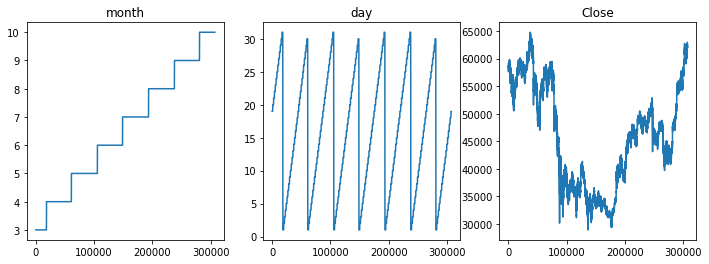

In [ ]:
# Go through those columns with missing data
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(df['month'])
axes[0].set_title("month")

axes[1].plot(df['day'])
axes[1].set_title("day")

axes[2].plot(df['Close'])
axes[2].set_title("Close")

In [ ]:
# Normlization 

### ........date ! 

data=df
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

data.iloc[:,0:5]=min_max.fit_transform(data.iloc[:,0:5])
data.iloc[:,9:29]=min_max.fit_transform(data.iloc[:,9:29])


data

,Open,High,Low,Close,Volume,year,month,day,hours,Open1,High1,Low1,Close1,Volume1,Open2,High2,Low2,Close2,Volume2,Open3,High3,Low3,Close3,Volume3,Close4
0,0.814632,0.814728,0.817561,0.815998,0.011002,2021.0,3.0,19.0,1.640417e+18,0.816045,0.814321,0.817160,0.814514,0.009105,0.816045,0.814321,0.817160,0.814514,0.009105,0.816045,0.814321,0.817160,0.814514,0.009105,0.814514
1,0.816045,0.814321,0.817160,0.814514,0.009105,2021.0,3.0,19.0,1.640417e+18,0.814516,0.814200,0.817445,0.816028,0.005311,0.814516,0.814200,0.817445,0.816028,0.005311,0.814516,0.814200,0.817445,0.816028,0.005311,0.816028
2,0.814516,0.814200,0.817445,0.816028,0.005311,2021.0,3.0,19.0,1.640417e+18,0.816031,0.814719,0.818962,0.816536,0.004173,0.816031,0.814719,0.818962,0.816536,0.004173,0.816031,0.814719,0.818962,0.816536,0.004173,0.816536
3,0.816031,0.814719,0.818962,0.816536,0.004173,2021.0,3.0,19.0,1.640417e+18,0.816517,0.815687,0.817861,0.815894,0.011002,0.816517,0.815687,0.817861,0.815894,0.011002,0.816517,0.815687,0.817861,0.815894,0.011002,0.815894
4,0.816517,0.815687,0.817861,0.815894,0.011002,2021.0,3.0,19.0,1.640417e+18,0.815897,0.815037,0.818827,0.816644,0.004932,0.815897,0.815037,0.818827,0.816644,0.004932,0.815897,0.815037,0.818827,0.816644,0.004932,0.816644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307336,0.927333,0.925693,0.928189,0.925412,0.006449,2021.0,10.0,19.0,1.640417e+18,0.925413,0.923770,0.926979,0.924997,0.009863,0.925413,0.923770,0.926979,0.924997,0.009863,0.925413,0.923770,0.926979,0.924997,0.009863,0.924997
307337,0.925413,0.923770,0.926979,0.924997,0.009863,2021.0,10.0,19.0,1.640417e+18,0.924832,0.923188,0.925163,0.923795,0.069803,0.924832,0.923188,0.925163,0.923795,0.069803,0.924832,0.923188,0.925163,0.923795,0.069803,0.923795
307338,0.924832,0.923188,0.925163,0.923795,0.069803,2021.0,10.0,19.0,1.640417e+18,0.923797,0.922644,0.926134,0.923245,0.005690,0.923797,0.922644,0.926134,0.923245,0.005690,0.923797,0.922644,0.926134,0.923245,0.005690,0.923245
307339,0.923797,0.922644,0.926134,0.923245,0.005690,2021.0,10.0,19.0,1.640417e+18,0.923246,0.921722,0.926180,0.923351,0.003414,0.923246,0.921722,0.926180,0.923351,0.003414,0.923246,0.921722,0.926180,0.923351,0.003414,0.923351


#### data scaling

In [ ]:


# use MinMaxScaler to scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#split data
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 20)

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [ ]:
df

,Open,High,Low,Close,Volume,year,month,day,hours,Open1,High1,Low1,Close1,Volume1,Open2,High2,Low2,Close2,Volume2,Open3,High3,Low3,Close3,Volume3,Close4
0,0.814632,0.814728,0.817561,0.815998,0.011002,2021.0,3.0,19.0,1.640417e+18,0.816045,0.814321,0.817160,0.814514,0.009105,0.816045,0.814321,0.817160,0.814514,0.009105,0.816045,0.814321,0.817160,0.814514,0.009105,0.814514
1,0.816045,0.814321,0.817160,0.814514,0.009105,2021.0,3.0,19.0,1.640417e+18,0.814516,0.814200,0.817445,0.816028,0.005311,0.814516,0.814200,0.817445,0.816028,0.005311,0.814516,0.814200,0.817445,0.816028,0.005311,0.816028
2,0.814516,0.814200,0.817445,0.816028,0.005311,2021.0,3.0,19.0,1.640417e+18,0.816031,0.814719,0.818962,0.816536,0.004173,0.816031,0.814719,0.818962,0.816536,0.004173,0.816031,0.814719,0.818962,0.816536,0.004173,0.816536
3,0.816031,0.814719,0.818962,0.816536,0.004173,2021.0,3.0,19.0,1.640417e+18,0.816517,0.815687,0.817861,0.815894,0.011002,0.816517,0.815687,0.817861,0.815894,0.011002,0.816517,0.815687,0.817861,0.815894,0.011002,0.815894
4,0.816517,0.815687,0.817861,0.815894,0.011002,2021.0,3.0,19.0,1.640417e+18,0.815897,0.815037,0.818827,0.816644,0.004932,0.815897,0.815037,0.818827,0.816644,0.004932,0.815897,0.815037,0.818827,0.816644,0.004932,0.816644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307336,0.927333,0.925693,0.928189,0.925412,0.006449,2021.0,10.0,19.0,1.640417e+18,0.925413,0.923770,0.926979,0.924997,0.009863,0.925413,0.923770,0.926979,0.924997,0.009863,0.925413,0.923770,0.926979,0.924997,0.009863,0.924997
307337,0.925413,0.923770,0.926979,0.924997,0.009863,2021.0,10.0,19.0,1.640417e+18,0.924832,0.923188,0.925163,0.923795,0.069803,0.924832,0.923188,0.925163,0.923795,0.069803,0.924832,0.923188,0.925163,0.923795,0.069803,0.923795
307338,0.924832,0.923188,0.925163,0.923795,0.069803,2021.0,10.0,19.0,1.640417e+18,0.923797,0.922644,0.926134,0.923245,0.005690,0.923797,0.922644,0.926134,0.923245,0.005690,0.923797,0.922644,0.926134,0.923245,0.005690,0.923245
307339,0.923797,0.922644,0.926134,0.923245,0.005690,2021.0,10.0,19.0,1.640417e+18,0.923246,0.921722,0.926180,0.923351,0.003414,0.923246,0.921722,0.926180,0.923351,0.003414,0.923246,0.921722,0.926180,0.923351,0.003414,0.923351


### Train data with cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = {}
cv_s= {}

#### K-neighbors regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
training_accuracy = []
test_accuracy = []
neighbor_seetings = range(1,7)

for x in neighbor_seetings:
    knr = KNeighborsRegressor(n_neighbors = x)
    knr.fit(X_train, y_train)
    training_accuracy.append(knr.score(X_train, y_train))
    test_accuracy.append(knr.score(X_test,y_test))



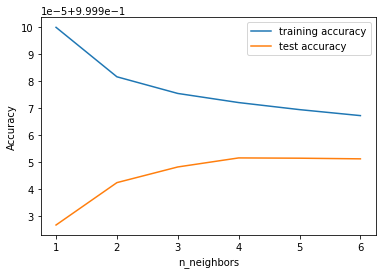

In [ ]:
# Show the relationship of accuarcy and n_neighbors
plt.plot(neighbor_seetings, training_accuracy, label = 'training accuracy')
plt.plot(neighbor_seetings, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel('n_neighbors')
plt.legend()

In [ ]:
# The best n_neighbors is 3
scores['K-neighbors regression'] = [training_accuracy[2],test_accuracy[2]]

In [ ]:
# Cross Validation
knr = KNeighborsRegressor(n_neighbors = 3)
cv_scores = cross_val_score(knr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(knr, X_test, y_test,cv = 5)
cv_s['K-neighbors regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.99994708 0.99994513 0.9999482  0.99994449 0.99994723]
Mean cross-validation training score (5-fold): 1.000


#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
print('Train score: {}'.format(lr.score(X_train, y_train)))
print('Test score: {}'.format(lr.score(X_test,y_test)))
scores['LinearRegression']=[lr.score(X_train, y_train),lr.score(X_test,y_test)]

Train score: 1.0
Test score: 1.0


In [ ]:
# Cross Validation
cv_scores = cross_val_score(lr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(lr, X_test, y_test,cv = 5)
cv_s['LinearRegression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [1. 1. 1. 1. 1.]
Mean cross-validation training score (5-fold): 1.000


#### Ridge

In [ ]:
# Alpha by default is 1.0
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print('Train score: {}'.format(ridge.score(X_train, y_train)))
print('Test score: {}'.format(ridge.score(X_test,y_test)))

Train score: 0.9999969854343533
Test score: 0.9999971482910489


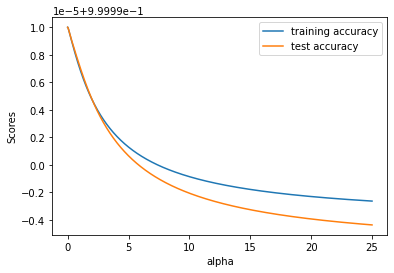

In [ ]:
a =np.linspace(0.001,25,1000)
training_accuracy = []
test_accuracy = []
for x in a:
    ridge = Ridge(alpha = x)
    ridge.fit(X_train, y_train)
    training_accuracy.append(ridge.score(X_train, y_train))
    test_accuracy.append(ridge.score(X_test,y_test))
    
plt.plot(a, training_accuracy, label = 'training accuracy')
plt.plot(a, test_accuracy, label = 'test accuracy')
plt.ylabel("Scores")
plt.xlabel('alpha')
plt.legend()

In [ ]:
# Use GridSearchCV to find the best alpha
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha':[0.001,0.01, 0.1,1]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

#use gridsearch to get the best parameters, alpha=0.001
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.001}
Best score 1.00


Best alpha is 0.001

In [ ]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)
scores['Ridge']=[ridge.score(X_train, y_train),ridge.score(X_test,y_test)]

In [ ]:
# Cross Validation
cv_scores = cross_val_score(ridge, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(ridge, X_test, y_test,cv = 5)
cv_s['Ridge']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [1. 1. 1. 1. 1.]
Mean cross-validation training score (5-fold): 1.000


#### Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 100000)
lasso.fit(X_train, y_train)
print('Train score: {}'.format(lasso.score(X_train, y_train)))
print('Test score: {}'.format(lasso.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Train score: 0.0
Test score: -3.23661628234273e-05
Number of features used: 0


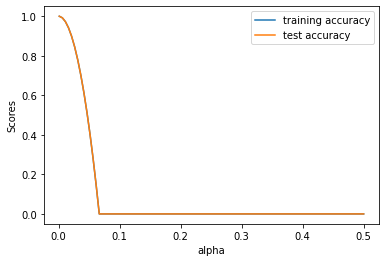

In [ ]:
a =np.linspace(0.001,0.5,100)
training_accuracy = []
test_accuracy = []
f = []
for x in a:
    lasso = Lasso(alpha = x, max_iter = 100000)
    lasso.fit(X_train, y_train)
    training_accuracy.append(lasso.score(X_train, y_train))
    test_accuracy.append(lasso.score(X_test,y_test))
    f.append(np.sum(lasso.coef_!=0))
plt.plot(a, training_accuracy, label = 'training accuracy')
plt.plot(a, test_accuracy, label = 'test accuracy')
plt.ylabel("Scores")
plt.xlabel('alpha')
plt.legend()

In [ ]:
lasso = Lasso(max_iter = 100000)
param_grid = {'alpha':[0.017, 0.02, 0.023, 0.026]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.017}
Best score 0.9345879796922404


In [ ]:
lasso = Lasso(alpha = 0.023,max_iter = 100000)
lasso.fit(X_train, y_train)
scores['Lasso']=[lasso.score(X_train, y_train),lasso.score(X_test,y_test)]

In [ ]:
# Cross Validation
cv_scores = cross_val_score(lasso, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(lasso, X_test, y_test,cv = 5)
cv_s['Lasso']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.88050196 0.88012071 0.88020923 0.88038316 0.88026414]
Mean cross-validation training score (5-fold): 0.880


#### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_py, X_test_py, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 20)

linreg = LinearRegression()
linreg.fit(X_train_py, y_train)
print('Polynomial LinearRegression')
print('Train score: {}'.format(linreg.score(X_train_py, y_train)))
print('Test score: {}\n'.format(linreg.score(X_test_py,y_test)))
scores['Polynomial deg 2 LinearRegression']=[linreg.score(X_train_py, y_train),linreg.score(X_test_py,y_test)]

linridge = Ridge()
linridge.fit(X_train_py, y_train)
print('Polynomial Ridge Regression')
print('Train score: {}'.format(linridge.score(X_train_py, y_train)))
print('Test score: {}\n'.format(linridge.score(X_test_py,y_test)))
scores['Polynomial deg 2 Ridge Regression']=[linridge.score(X_train_py, y_train),linridge.score(X_test_py,y_test)]

linlasso = Lasso()
linlasso.fit(X_train_py, y_train)
print('Polynomial Lasso Regression')
print('Train score: {}'.format(linlasso.score(X_train_py, y_train)))
print('Test score: {}'.format(linlasso.score(X_test_py,y_test)))
scores['Polynomial deg 2 Lasso Regression']=[linlasso.score(X_train_py, y_train),linlasso.score(X_test_py,y_test)]

Polynomial LinearRegression
Train score: 0.9999999997699989
Test score: 0.9999999997694083

Polynomial Ridge Regression
Train score: 0.9999999988208133
Test score: 0.9999999988184003



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.808e+00, tolerance: 1.628e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Polynomial Lasso Regression
Train score: 0.9999567292334883
Test score: 0.9998965580846594


In [ ]:
# Cross Validation
cv_scores = cross_val_score(linreg, X_train_py, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(linreg, X_test_py, y_test,cv = 5)
cv_s['Polynomial deg 2 LinearRegression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

cv_scores = cross_val_score(linridge, X_train_py, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(linridge, X_test_py, y_test,cv = 5)
cv_s['Polynomial deg 2 Ridge Regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

cv_scores = cross_val_score(linlasso, X_train_py, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(linlasso, X_test_py, y_test,cv = 5)
cv_s['Polynomial deg 2 Lasso Regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [1. 1. 1. 1. 1.]
Mean cross-validation training score (5-fold): 1.000
Cross-validation training scores (5-fold): [1. 1. 1. 1. 1.]
Mean cross-validation training score (5-fold): 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.849e+00, tolerance: 1.304e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.844e+00, tolerance: 1.302e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Cross-validation training scores (5-fold): [0.99995826 0.99995548 0.99995928 0.99995398 0.99995589]
Mean cross-validation training score (5-fold): 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+00, tolerance: 3.285e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+00, tolerance: 3.281e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

#### SVR


In [ ]:
from sklearn.svm import SVR
# SVM, with kernel: (linear)
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
print('Train score: {}'.format(svr.score(X_train, y_train)))
print('Test score: {}\n'.format(svr.score(X_test,y_test)))
scores['SVM']=[svr.score(X_train, y_train),svr.score(X_test,y_test)]

#### kernel(rbf) = 99% 
###  kernel (poly  , degree = 3 ) 96 % 

Train score: 0.9598007182335719
Test score: 0.9597713218643702



In [ ]:
cv_scores = cross_val_score(svr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(svr, X_test, y_test,cv = 5)
cv_s['SVM']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.95954677 0.95979406 0.9598878  0.95987762 0.9593931 ]
Mean cross-validation training score (5-fold): 0.960


In [ ]:
# SVR without kernel
from sklearn.svm import LinearSVR
lsvr = LinearSVR()
lsvr.fit(X_train, y_train)
print('Train score: {}'.format(lsvr.score(X_train, y_train)))
print('Test score: {}\n'.format(lsvr.score(X_test,y_test)))
scores['SVM without kernel']=[lsvr.score(X_train, y_train),lsvr.score(X_test,y_test)]

Train score: 0.9999999999996214
Test score: 0.9999999998338402



In [ ]:
# Cross Validation
cv_scores = cross_val_score(lsvr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(lsvr, X_test, y_test,cv = 5)
cv_s['SVM without kernel']=[np.mean(cv_scores),np.mean(cv_test_scores)]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Cross-validation training scores (5-fold): [1. 1. 1. 1. 1.]
Mean cross-validation training score (5-fold): 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### Evaluation

In [ ]:
df = pd.DataFrame(scores).T
df.columns = ['Train Score','Test Score']
df = pd.concat([df,pd.DataFrame(cv_s,index = [['Cross_Validation_Train_Score','Cross_Validation_Test_Score']]).T],axis=1, join='inner')
df

,Train Score,Test Score,"(Cross_Validation_Train_Score,)","(Cross_Validation_Test_Score,)"
K-neighbors regression,0.999975,0.999948,0.999946,0.999902


I think the Polynomial deg 2 Lasso Regression is the best model.